In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

heart_disease = fetch_ucirepo(id=45) 

plt.rcParams['font.family'] = 'sans-serif'

X = heart_disease.data.features
y = heart_disease.data.targets
y = y.where(y == 0, 1)

data = pd.concat([X, y], axis=1)

In [2]:
y.value_counts()

num
0      164
1      139
Name: count, dtype: int64

In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<Axes: xlabel='age'>

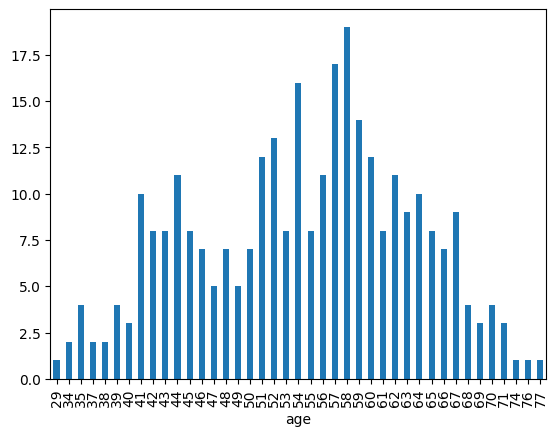

In [5]:
age = X['age']
age.value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='count'>

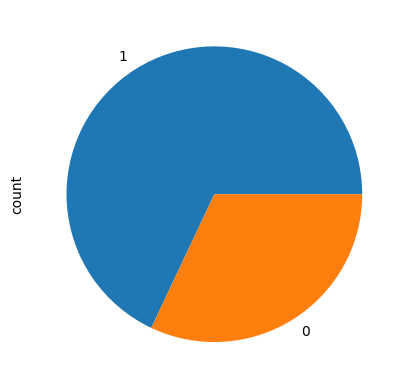

In [6]:
sex = X['sex']
sex.value_counts().plot(kind='pie')

<Axes: xlabel='cp'>

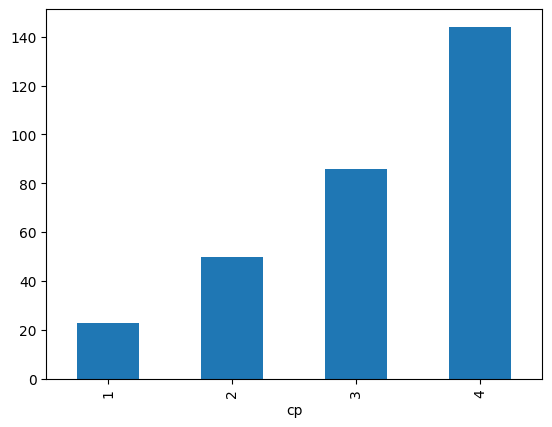

In [7]:
cp = X['cp']

cp.value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='Frequency'>

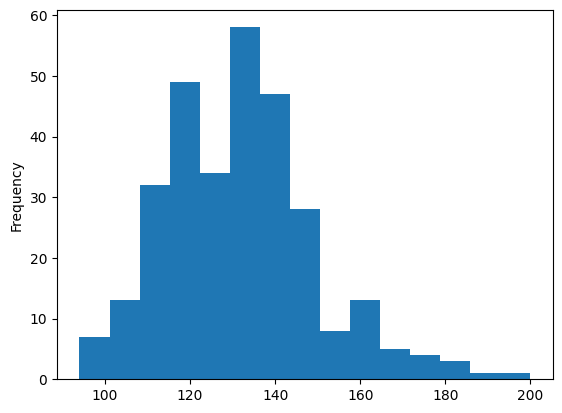

In [8]:
tresbps = X['trestbps']
tresbps.plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

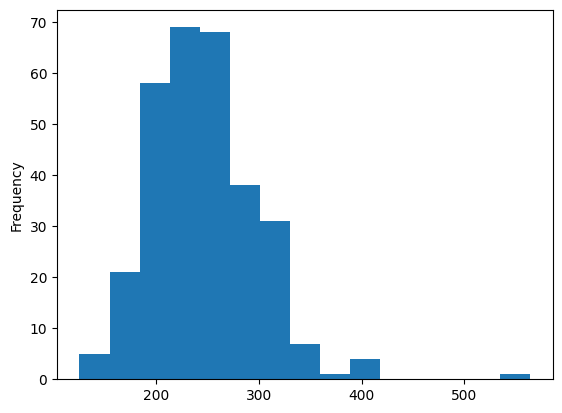

In [9]:
chol = X['chol']
chol.plot(kind='hist', bins=15)

<Axes: ylabel='count'>

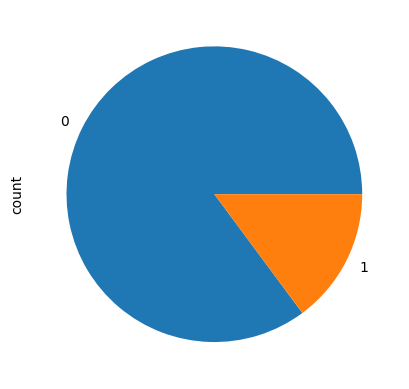

In [10]:
fbs = X['fbs']
fbs.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

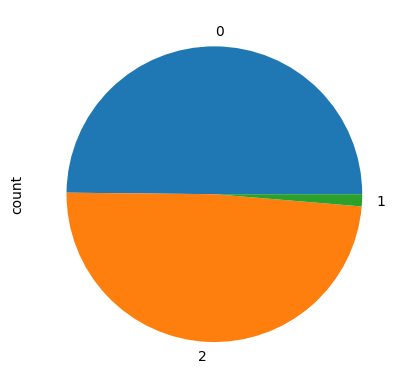

In [11]:
restecg = X['restecg']
restecg.value_counts().plot(kind='pie') 

<Axes: ylabel='Frequency'>

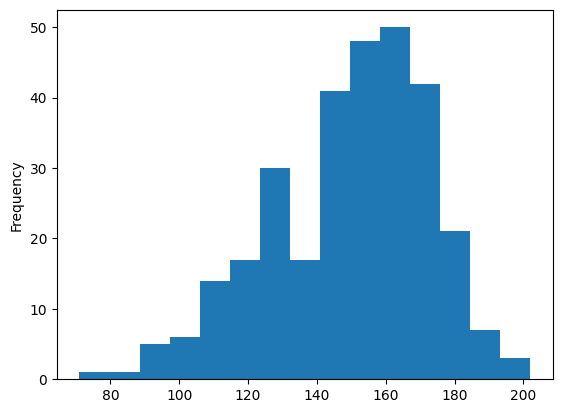

In [12]:
thalach = X['thalach']
thalach.plot(kind='hist', bins=15)

<Axes: ylabel='count'>

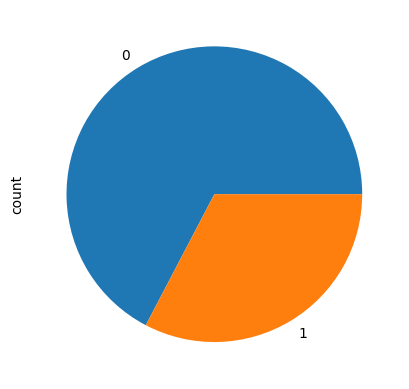

In [13]:
exang = X['exang']
exang.value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

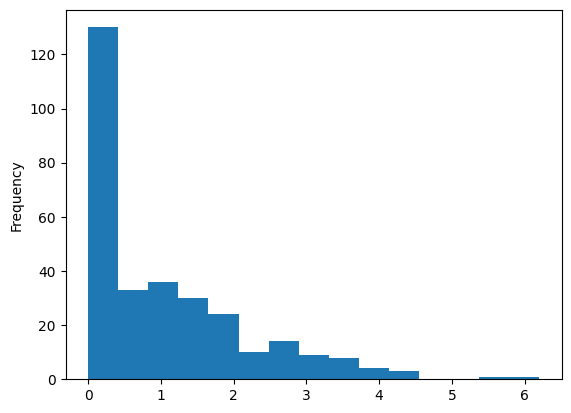

In [14]:
oldpeak = X['oldpeak']
oldpeak.plot(kind='hist', bins=15)

<Axes: ylabel='count'>

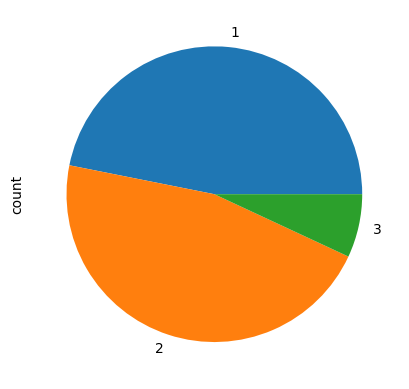

In [15]:
slope = X['slope']
slope.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

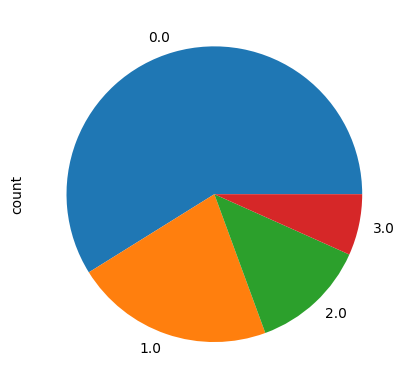

In [16]:
ca = X['ca']
ca.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

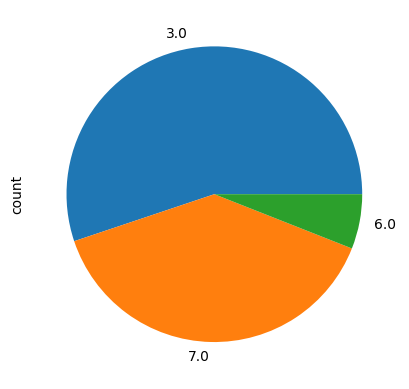

In [17]:
thal = X['thal']
thal.value_counts().plot(kind='pie')

In [18]:
cat = X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]
num = X.drop(columns=cat.columns)

In [19]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

<Axes: >

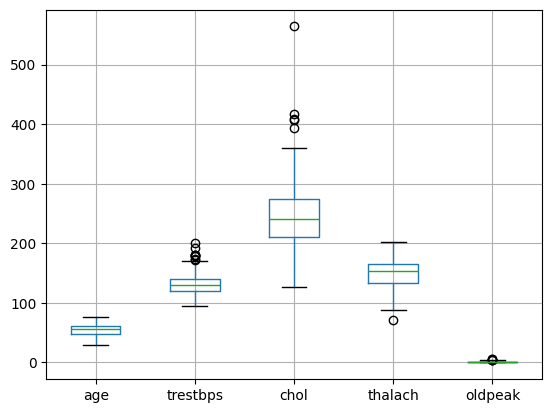

In [20]:
num.boxplot()

In [21]:
num_corr = pd.concat([num, y], axis=1).corr()

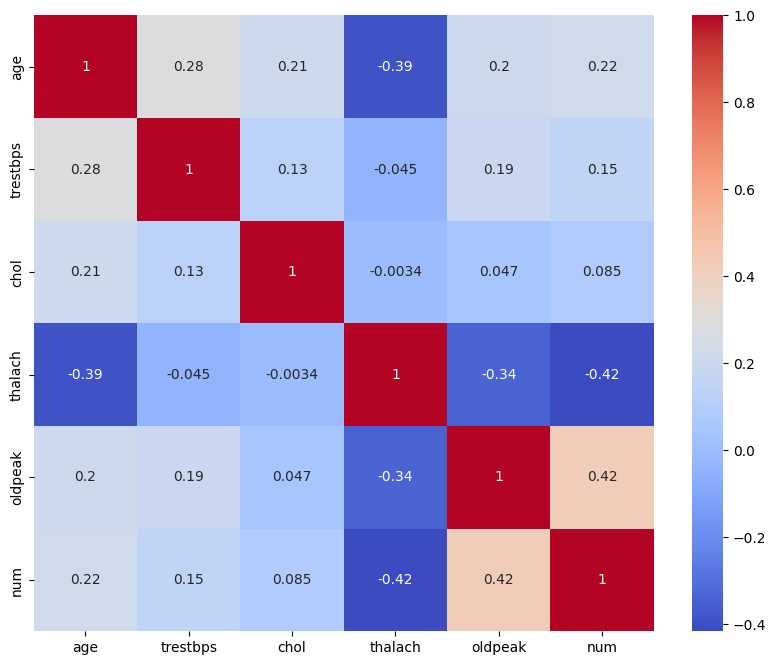

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_corr, annot=True, fmt='.2g', cmap='coolwarm')
plt.show()


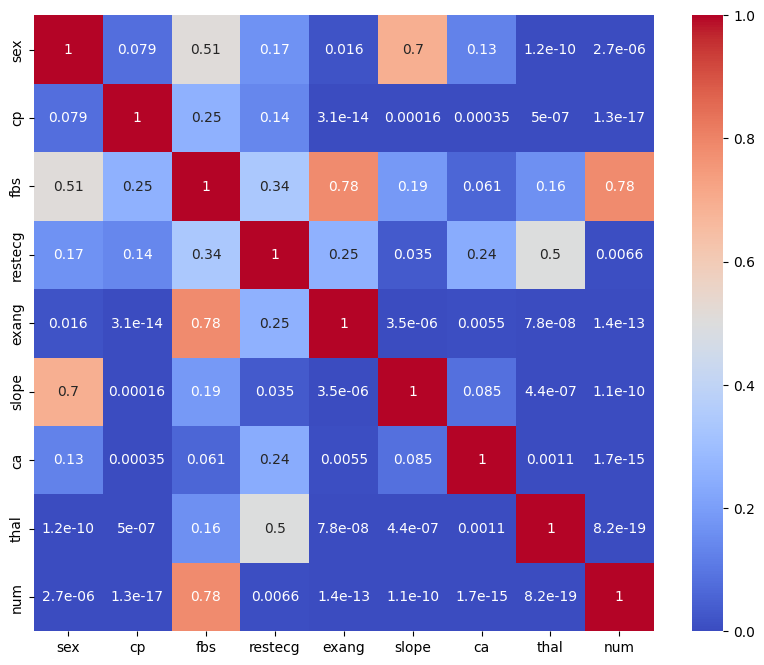

In [23]:
from scipy.stats import chi2_contingency

p_values_matrix = pd.DataFrame(index=cat.columns, columns=cat.columns)
cat = pd.concat([cat, y], axis=1)
categorical_columns = cat.columns

p_values_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=np.float64)

# 对每对分类变量进行卡方检验并填充p值
for i in range(len(categorical_columns)):
    for j in range(i, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        if i == j:
            p_values_matrix.loc[col1, col2] = 1.0
        else:
            contingency_table = pd.crosstab(cat[col1], cat[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            p_values_matrix.loc[col1, col2] = p
            p_values_matrix.loc[col2, col1] = p


plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', fmt='.2g')
plt.show()

cat = cat.drop(columns='num')

In [24]:
p_values_matrix

,sex,cp,fbs,restecg,exang,slope,ca,thal,num
sex,1.000000e+00,7.885024e-02,0.509260,0.166534,1.579410e-02,6.951351e-01,1.278866e-01,1.225282e-10,2.666712e-06
cp,7.885024e-02,1.000000e+00,0.254363,0.140289,3.051565e-14,1.605360e-04,3.540681e-04,5.030028e-07,1.251711e-17
fbs,5.092599e-01,2.543631e-01,1.000000,0.336950,7.836774e-01,1.851322e-01,6.086592e-02,1.634654e-01,7.812734e-01
restecg,1.665345e-01,1.402892e-01,0.336950,1.000000,2.549978e-01,3.491630e-02,2.415234e-01,4.985387e-01,6.566524e-03
exang,1.579410e-02,3.051565e-14,0.783677,0.254998,1.000000e+00,3.490091e-06,5.529962e-03,7.757568e-08,1.413788e-13
slope,6.951351e-01,1.605360e-04,0.185132,0.034916,3.490091e-06,1.000000e+00,8.516625e-02,4.384547e-07,1.142885e-10
ca,1.278866e-01,3.540681e-04,0.060866,0.241523,5.529962e-03,8.516625e-02,1.000000e+00,1.148854e-03,1.719952e-15
thal,1.225282e-10,5.030028e-07,0.163465,0.498539,7.757568e-08,4.384547e-07,1.148854e-03,1.000000e+00,8.201820e-19
num,2.666712e-06,1.251711e-17,0.781273,0.006567,1.413788e-13,1.142885e-10,1.719952e-15,8.201820e-19,1.000000e+00


# 数据预处理

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

preprocessor = Pipeline([
    ('robust', RobustScaler()),
    ('standard', StandardScaler())
])
num = preprocessor.fit_transform(num)

<Axes: >

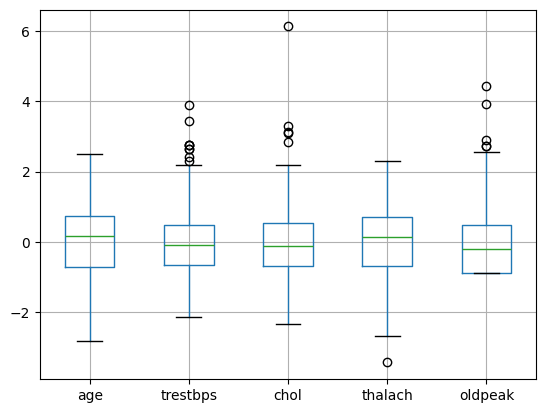

In [26]:
num = pd.DataFrame(num, columns=X.columns.drop(cat.columns))
num.boxplot()

In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

ca = cat['ca']
ca = imputer.fit_transform(ca.values.reshape(-1, 1))

In [28]:
ca = pd.Series(ca.flatten())

def replace_close_values(val, target=0.672241, new_value=1, tolerance=0.3):
    return new_value if np.isclose(val, target, atol=tolerance) else val

ca = ca.apply(replace_close_values)
ca = pd.get_dummies(ca, prefix='ca')

In [29]:
thal = X['thal']

def replace_close_values(val, target=4.73, new_value=6, tolerance=0.3):
    return new_value if np.isclose(val, target, atol=tolerance) else val

thal = imputer.fit_transform(thal.values.reshape(-1, 1))
thal = pd.Series(thal.flatten())
thal = thal.apply(replace_close_values)
thal = pd.get_dummies(thal, prefix='thal')

In [30]:
restecg = pd.get_dummies(restecg, prefix='restecg')
slope = cat['slope']
slope = pd.get_dummies(slope, prefix='slope')

In [31]:
cp = pd.get_dummies(cp, prefix='cp')

In [32]:
cat = cat.drop(columns=['ca', 'thal', 'restecg', 'slope', 'cp'])
cat = pd.concat([cat, ca, thal, restecg, slope, cp], axis=1)

In [33]:
X = np.hstack([num, cat])

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle')
X = pca.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
y_train = y_train.values.ravel()

# 分析与建模

In [36]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV


In [37]:
def evaluate(model, train_X, train_y, test_X, test_y):
    train_X_pred, test_X_pred = model.predict(train_X), model.predict(test_X)
    scores = {'accuracy': [accuracy_score(train_y, train_X_pred), accuracy_score(test_y, test_X_pred)],
            'precision': [precision_score(train_y, train_X_pred), precision_score(test_y, test_X_pred)],
            'recall': [recall_score(train_y, train_X_pred), recall_score(test_y, test_X_pred)],
            'f1': [f1_score(y_true, y_pred) for y_true, y_pred in [(train_y, train_X_pred), (test_y, test_X_pred)]]}
    return pd.DataFrame(scores, index=['train set', 'test set']).T

In [38]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
evaluate(lgr, X_train, y_train, X_test, y_test)

,train set,test set
accuracy,0.857143,0.860000
precision,0.847826,0.847826
recall,0.838710,0.847826
f1,0.843243,0.847826


In [39]:
from sklearn.svm import SVC
prameters = {'C':[0.1, 0.5, 1, 5, 10], 'gamma':[10, 1, 0.1, 0.01, 0.001, 1e-4]}
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, prameters, cv=5)

grid.fit(X_train, y_train)

svc = grid.best_estimator_

evaluate(svc, X_train, y_train, X_test, y_test)

,train set,test set
accuracy,0.837438,0.880000
precision,0.840909,0.869565
recall,0.795699,0.869565
f1,0.817680,0.869565


In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaluate(gnb, X_train, y_train, X_test, y_test)

,train set,test set
accuracy,0.812808,0.810000
precision,0.766990,0.745455
recall,0.849462,0.891304
f1,0.806122,0.811881


In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier
prameters = {'learning_rate':[0.1, 0.5, 1], 'max_iter':[100, 200, 300]}
hgb = HistGradientBoostingClassifier()
grid = GridSearchCV(hgb, prameters, cv=5)
grid.fit(X_train, y_train)

hgb = grid.best_estimator_
evaluate(hgb, X_train, y_train, X_test, y_test)

,train set,test set
accuracy,1.0,0.810000
precision,1.0,0.800000
recall,1.0,0.782609
f1,1.0,0.791209


In [42]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators': [100, 300, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, parameters, cv=5)
grid.fit(X_train, y_train)
rfc = grid.best_estimator_
evaluate(rfc, X_train, y_train, X_test, y_test)

/home/onatter/miniconda3/envs/ag312/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,train set,test set
accuracy,0.990148,0.790000
precision,0.989247,0.735849
recall,0.989247,0.847826
f1,0.989247,0.787879


In [43]:
from sklearn.neural_network import MLPClassifier
parameters = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300]}
mlp = MLPClassifier()
grid = GridSearchCV(mlp, parameters, cv=5)
grid.fit(X_train, y_train)
mlp = grid.best_estimator_
evaluate(mlp, X_train, y_train, X_test, y_test)

/home/onatter/miniconda3/envs/ag312/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/onatter/miniconda3/envs/ag312/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/onatter/miniconda3/envs/ag312/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/onatter/miniconda3/envs/ag312/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
 

,train set,test set
accuracy,0.842365,0.890000
precision,0.850575,0.888889
recall,0.795699,0.869565
f1,0.822222,0.879121


In [44]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(pd.concat([pd.DataFrame(X_train).reset_index(drop=True), 
                                       pd.DataFrame(y_train, columns=['target']).reset_index(drop=True)], axis=1, ignore_index=True))
test_data = TabularDataset(pd.concat([pd.DataFrame(X_test).reset_index(drop=True), y_test.reset_index(drop=True)], axis=1, ignore_index=True))

predictor = TabularPredictor(label=20).fit(train_data)

predictor.evaluate(test_data, silent=True)

/home/onatter/miniconda3/envs/ag312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20241221_133257"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          16
Memory Avail:       23.96 GB / 27.27 GB (87.9%)
Disk Space Avail:   758.67 GB / 1006.85 GB (75.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='exper

{'accuracy': 0.78,
 'balanced_accuracy': 0.7753623188405797,
 'mcc': 0.5561240279482094,
 'roc_auc': 0.8880837359098229,
 'f1': 0.75,
 'precision': 0.7857142857142857,
 'recall': 0.717391304347826}